# Color, Threshold, Blue Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read in and display the image

In [2]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions
print('This image is:', type(image),
      'with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


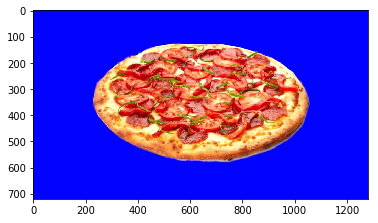

In [3]:
%matplotlib inline

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)


### Define the color threshold

In [4]:
# Define our color selection boundaries in RGB values
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([150, 255, 255])

### Create a mask

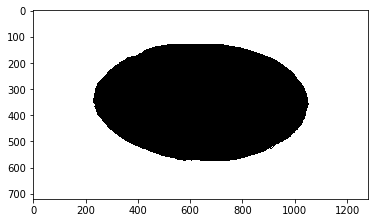

In [5]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualize the mask
plt.imshow(mask, cmap='gray')

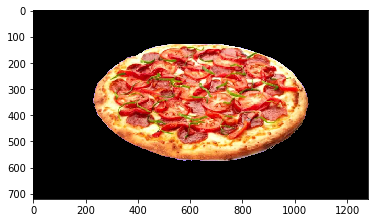

In [6]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

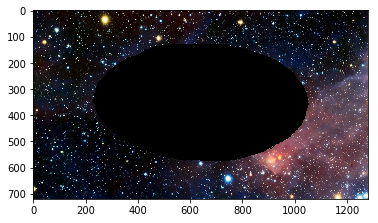

In [7]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size
crop_background = background_image[:masked_image.shape[0], :masked_image.shape[1]]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the backgraund
plt.imshow(crop_background)

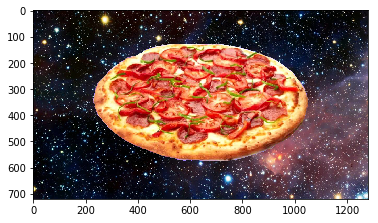

In [8]:
# Add the images together to create a complete image!
complete_image = crop_background + masked_image

plt.imshow(complete_image)